# Process Continuous Data (SILIVRI)

In [36]:
import os
import obspy
from continuous_data_processor import ContinuousDataPreprocessor

In [32]:
catalog_path = "/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/processed_catalogs/afad_catalog.csv"
waveforms_dir = "/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day"

In [33]:
station_dirs = []
for (root, dirs, files) in os.walk(waveforms_dir):
    for dir in dirs:
        station_dirs.append(os.path.join(waveforms_dir,dir)) 
station_dirs

['/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/ADVT',
 '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/CTKS',
 '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/ERIK',
 '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/TKR',
 '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/IZI',
 '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/SLVT',
 '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/UKOP',
 '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_

In [34]:
for station in station_dirs:
    print(station.split('/')[-1])
    for (root, dirs, files) in os.walk(station):
        print(len(files))
        print('--------------------------------')

ADVT
273
--------------------------------
CTKS
273
--------------------------------
ERIK
273
--------------------------------
TKR
273
--------------------------------
IZI
273
--------------------------------
SLVT
243
--------------------------------
UKOP
273
--------------------------------
BGKT
273
--------------------------------
MRMT
273
--------------------------------
ISK
270
--------------------------------
KRBG
273
--------------------------------
KLYT
273
--------------------------------
YLV
273
--------------------------------
KCTX
102
--------------------------------
ARMT
264
--------------------------------
ORLT
273
--------------------------------
OSMT
273
--------------------------------
LAP
204
--------------------------------
KAVV
231
--------------------------------
GONE
273
--------------------------------
CRLT
162
--------------------------------
GELI
273
--------------------------------
HRTX
273
--------------------------------
RKY
162
-------------------------------

## Initialize Preprocessor

In [37]:
preprocessor = ContinuousDataPreprocessor(
    catalog_csv=catalog_path,
    output_hdf5_path="output/continuous_waveforms.hdf5",
    output_metadata_csv_path="output/continuous_metadata.csv",
    window_length=60, 
    sampling_rate=100
)

ValueError: time data "2019-09-01T01:07:47" doesn't match format "%Y-%m-%dT%H:%M:%S.%f", at position 90. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

## Process Only One Station

In [ ]:
preprocessor.process_station(station_dirs[0])

## Process All Stations

In [ ]:
for station_dir in station_dirs:
    print(f"Processing station: {station_dir}")
    preprocessor.process_station(station_dir)

print("All stations processed!")

# Example Station MSEED 

In [18]:
advt_st = obspy.read("/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/ADVT/*.mseed")

In [19]:
advt_st

351770 Trace(s) in Stream:

KO.ADVT..HHE | 2019-08-31T23:59:58.860000Z - 2019-09-01T00:03:08.990000Z | 100.0 Hz, 19014 samples
...
(351768 other traces)
...
KO.ADVT..HHZ | 2019-11-30T23:43:28.000000Z - 2019-12-01T00:00:04.290000Z | 100.0 Hz, 99630 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [20]:
advt_st.merge()

3 Trace(s) in Stream:
KO.ADVT..HHE | 2019-08-31T23:59:58.860000Z - 2019-12-01T00:00:00.990000Z | 100.0 Hz, 786240214 samples (masked)
KO.ADVT..HHN | 2019-08-31T23:59:57.120000Z - 2019-12-01T00:00:00.240000Z | 100.0 Hz, 786240313 samples (masked)
KO.ADVT..HHZ | 2019-08-31T23:59:59.410000Z - 2019-12-01T00:00:04.290000Z | 100.0 Hz, 786240489 samples (masked)

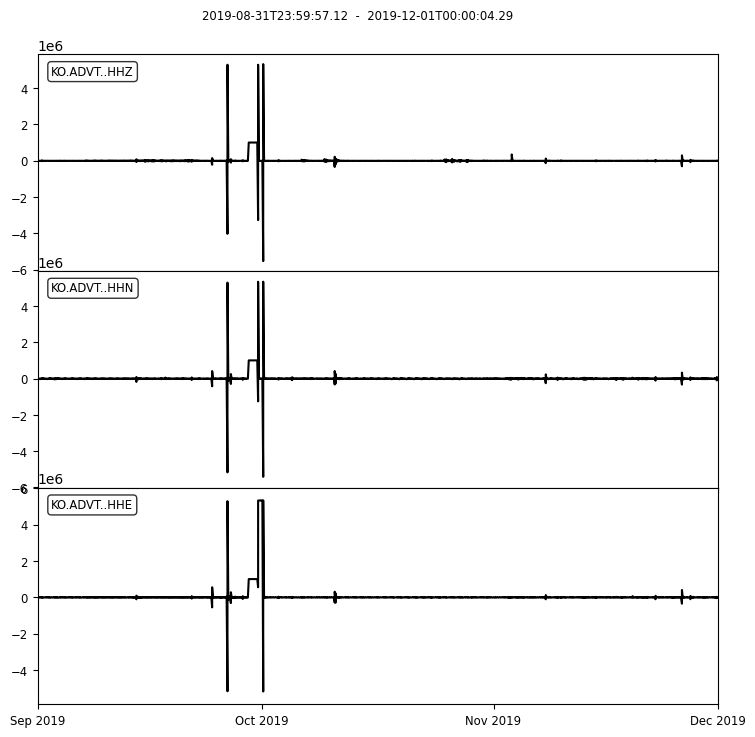

In [24]:
advt_st.plot();